# ARTIFICIAL INTELLIGENCE -- CA4
## Moein Shirdel - 810197535

### Phase 0: Visualization and EDA
#### In this phase, the purpose is to gain some information about the dataset and find out which features are the most effective ones in home pricing based on the given dataset.

In [25]:
import pandas as pd
DataFrame = pd.read_csv("train.csv")
DataFrame.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

1- Using info and describe methods, we can gather some information about the data. In the first block, the desrcribe method's output is shown. Statistics such as mean or standard deviation of each column's value is printed and in the second block, the output of info method is shown. Type of the values of each column and count of non-null values is represented.

In [27]:
def replace_nothing(df):
    columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
               'GarageType', 'GarageFinish','GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
    for column in columns:
        df[column].fillna("Nothing", inplace=True)
    
    return df

DataFrame = replace_nothing(DataFrame)
missing = DataFrame.isnull().sum() * 100 / len(DataFrame.index)
for i in range (len(missing)):
    print(DataFrame.columns[i]," :",missing[i])
DataFrame.head(10)

Id  : 0.0
MSSubClass  : 0.0
MSZoning  : 0.0
LotFrontage  : 17.73972602739726
LotArea  : 0.0
Street  : 0.0
Alley  : 0.0
LotShape  : 0.0
LandContour  : 0.0
Utilities  : 0.0
LotConfig  : 0.0
LandSlope  : 0.0
Neighborhood  : 0.0
Condition1  : 0.0
Condition2  : 0.0
BldgType  : 0.0
HouseStyle  : 0.0
OverallQual  : 0.0
OverallCond  : 0.0
YearBuilt  : 0.0
YearRemodAdd  : 0.0
RoofStyle  : 0.0
RoofMatl  : 0.0
Exterior1st  : 0.0
Exterior2nd  : 0.0
MasVnrType  : 0.547945205479452
MasVnrArea  : 0.547945205479452
ExterQual  : 0.0
ExterCond  : 0.0
Foundation  : 0.0
BsmtQual  : 0.0
BsmtCond  : 0.0
BsmtExposure  : 0.0
BsmtFinType1  : 0.0
BsmtFinSF1  : 0.0
BsmtFinType2  : 0.0
BsmtFinSF2  : 0.0
BsmtUnfSF  : 0.0
TotalBsmtSF  : 0.0
Heating  : 0.0
HeatingQC  : 0.0
CentralAir  : 0.0
Electrical  : 0.0684931506849315
1stFlrSF  : 0.0
2ndFlrSF  : 0.0
LowQualFinSF  : 0.0
GrLivArea  : 0.0
BsmtFullBath  : 0.0
BsmtHalfBath  : 0.0
FullBath  : 0.0
HalfBath  : 0.0
BedroomAbvGr  : 0.0
KitchenAbvGr  : 0.0
KitchenQual  : 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Nothing,Reg,Lvl,AllPub,...,0,Nothing,Nothing,Nothing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Nothing,Reg,Lvl,AllPub,...,0,Nothing,Nothing,Nothing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Nothing,IR1,Lvl,AllPub,...,0,Nothing,Nothing,Nothing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Nothing,IR1,Lvl,AllPub,...,0,Nothing,Nothing,Nothing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Nothing,IR1,Lvl,AllPub,...,0,Nothing,Nothing,Nothing,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,Nothing,IR1,Lvl,AllPub,...,0,Nothing,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Nothing,Reg,Lvl,AllPub,...,0,Nothing,Nothing,Nothing,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,Nothing,IR1,Lvl,AllPub,...,0,Nothing,Nothing,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Nothing,Reg,Lvl,AllPub,...,0,Nothing,Nothing,Nothing,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Nothing,Reg,Lvl,AllPub,...,0,Nothing,Nothing,Nothing,0,1,2008,WD,Normal,118000


2- Some categorical features include "NA" value as a category and they are not missing values,thus we have to replace "NA" values in that columns with something else (e.g "Nothing") and then calculate the missing values in the dataset. I've replaced NA in those columns with "nothing" at the beginning and then calculated the missing value's percentage for every single column. 

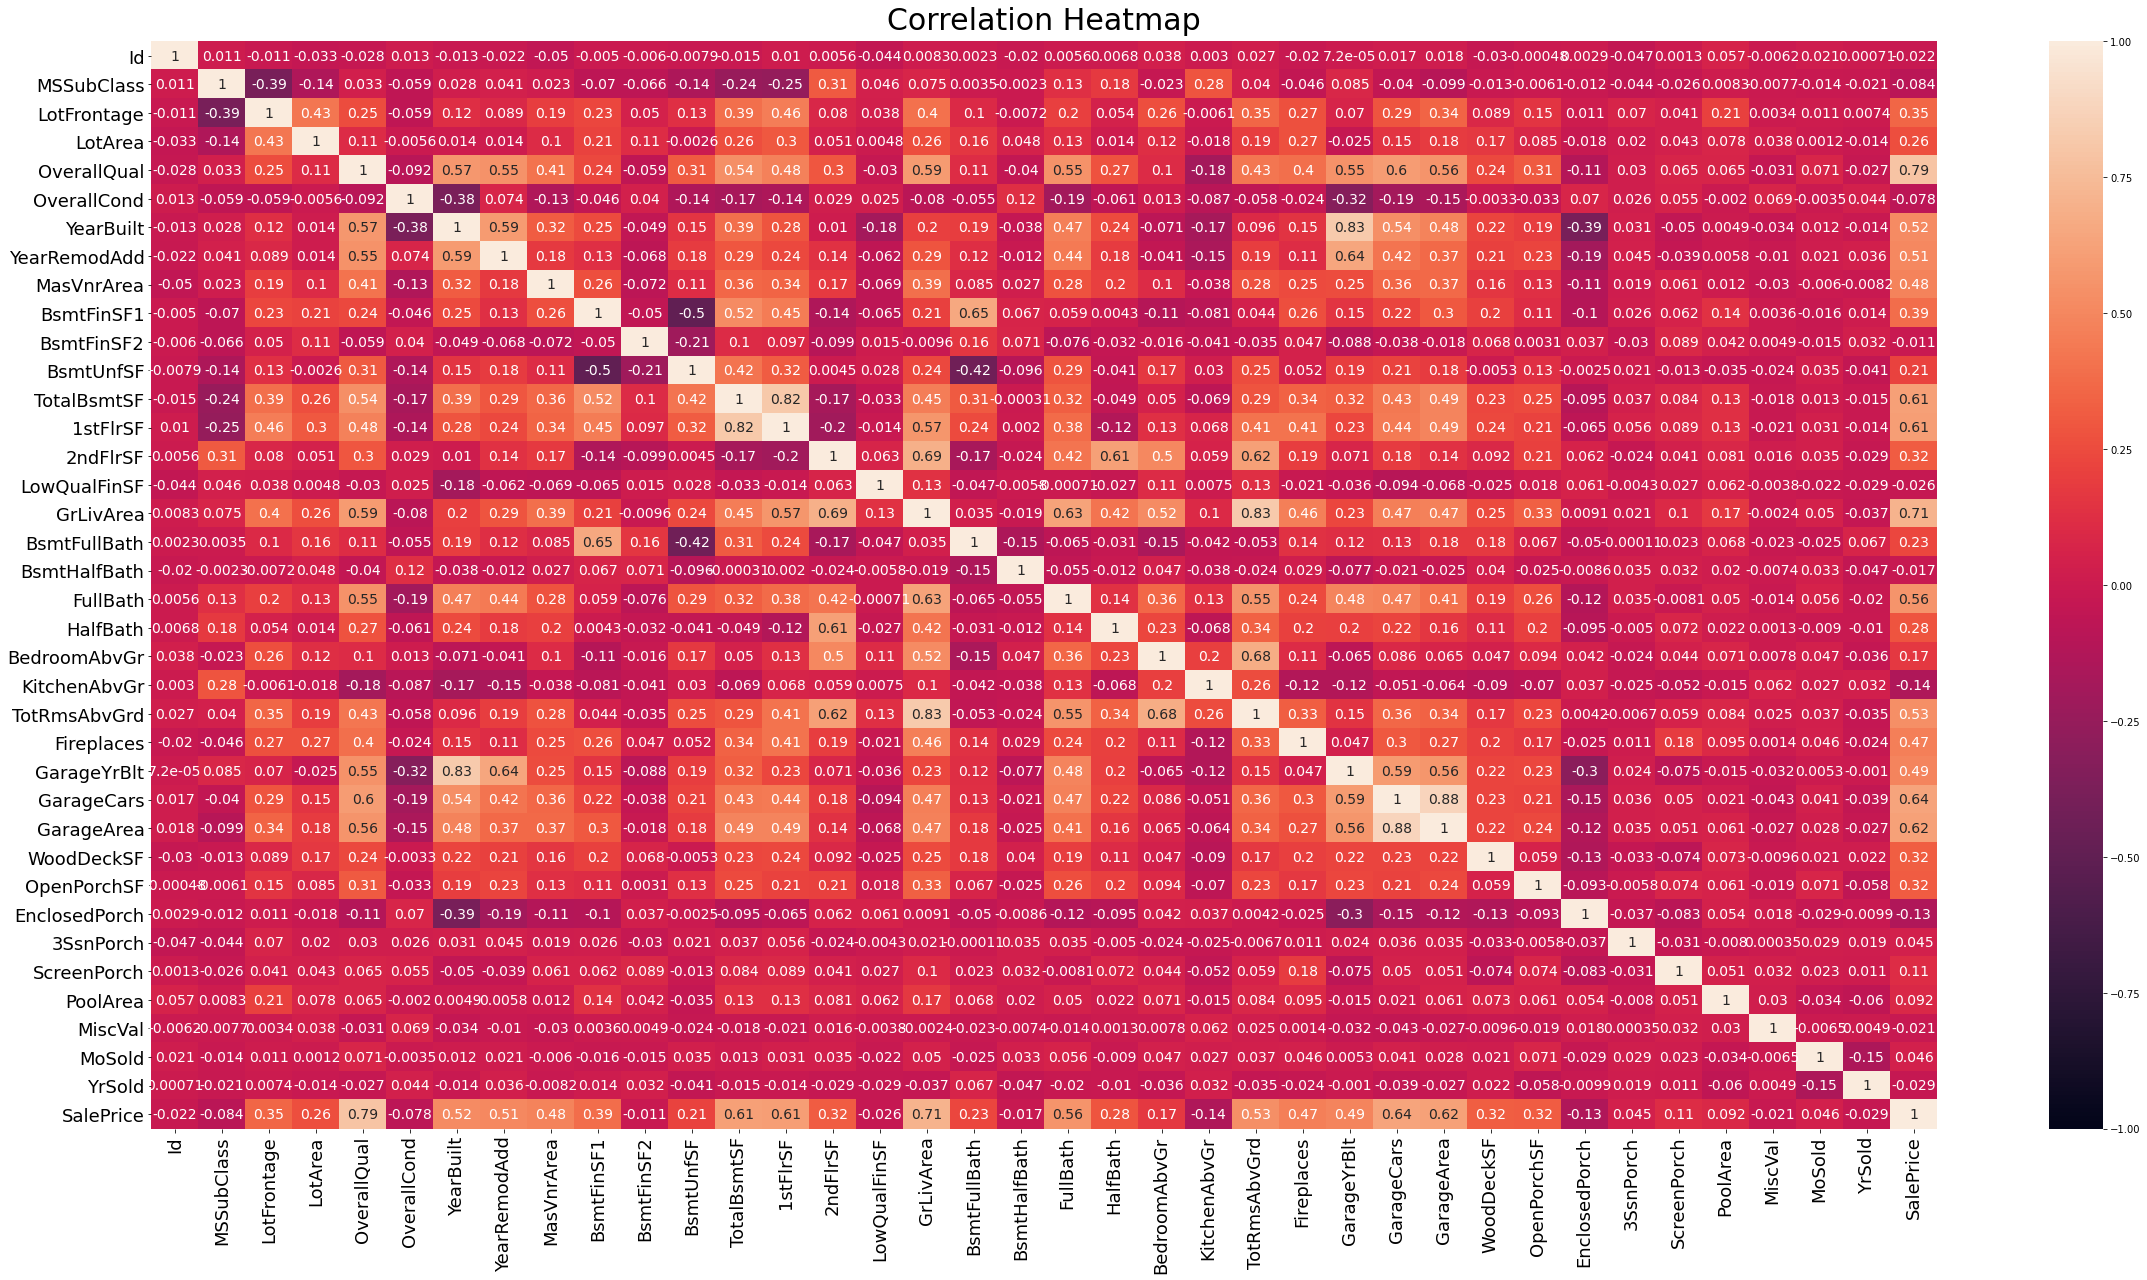

In [28]:
import seaborn as sb
import matplotlib.pyplot as mtplot
import numpy as np 

mtplot.figure(figsize=(40, 20))
HM = sb.heatmap(DataFrame.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size": 14})
HM.set_xticklabels(HM.get_xmajorticklabels(), fontsize = 18)
HM.set_yticklabels(HM.get_ymajorticklabels(), fontsize = 18)
HM.set_title('Correlation Heatmap', fontdict={'fontsize':30}, pad=12);

3- In the drawn heatmap, darker cells show weak relation between those two features. The last column in this heatmap is significant because we want to know the relationship rate between the features and "SalePrice" column. So the most effective attributes are the lighter ones such as "OverallQual", "GrLiveArea", "GarageCars", "GarageArea" and "FullBath".

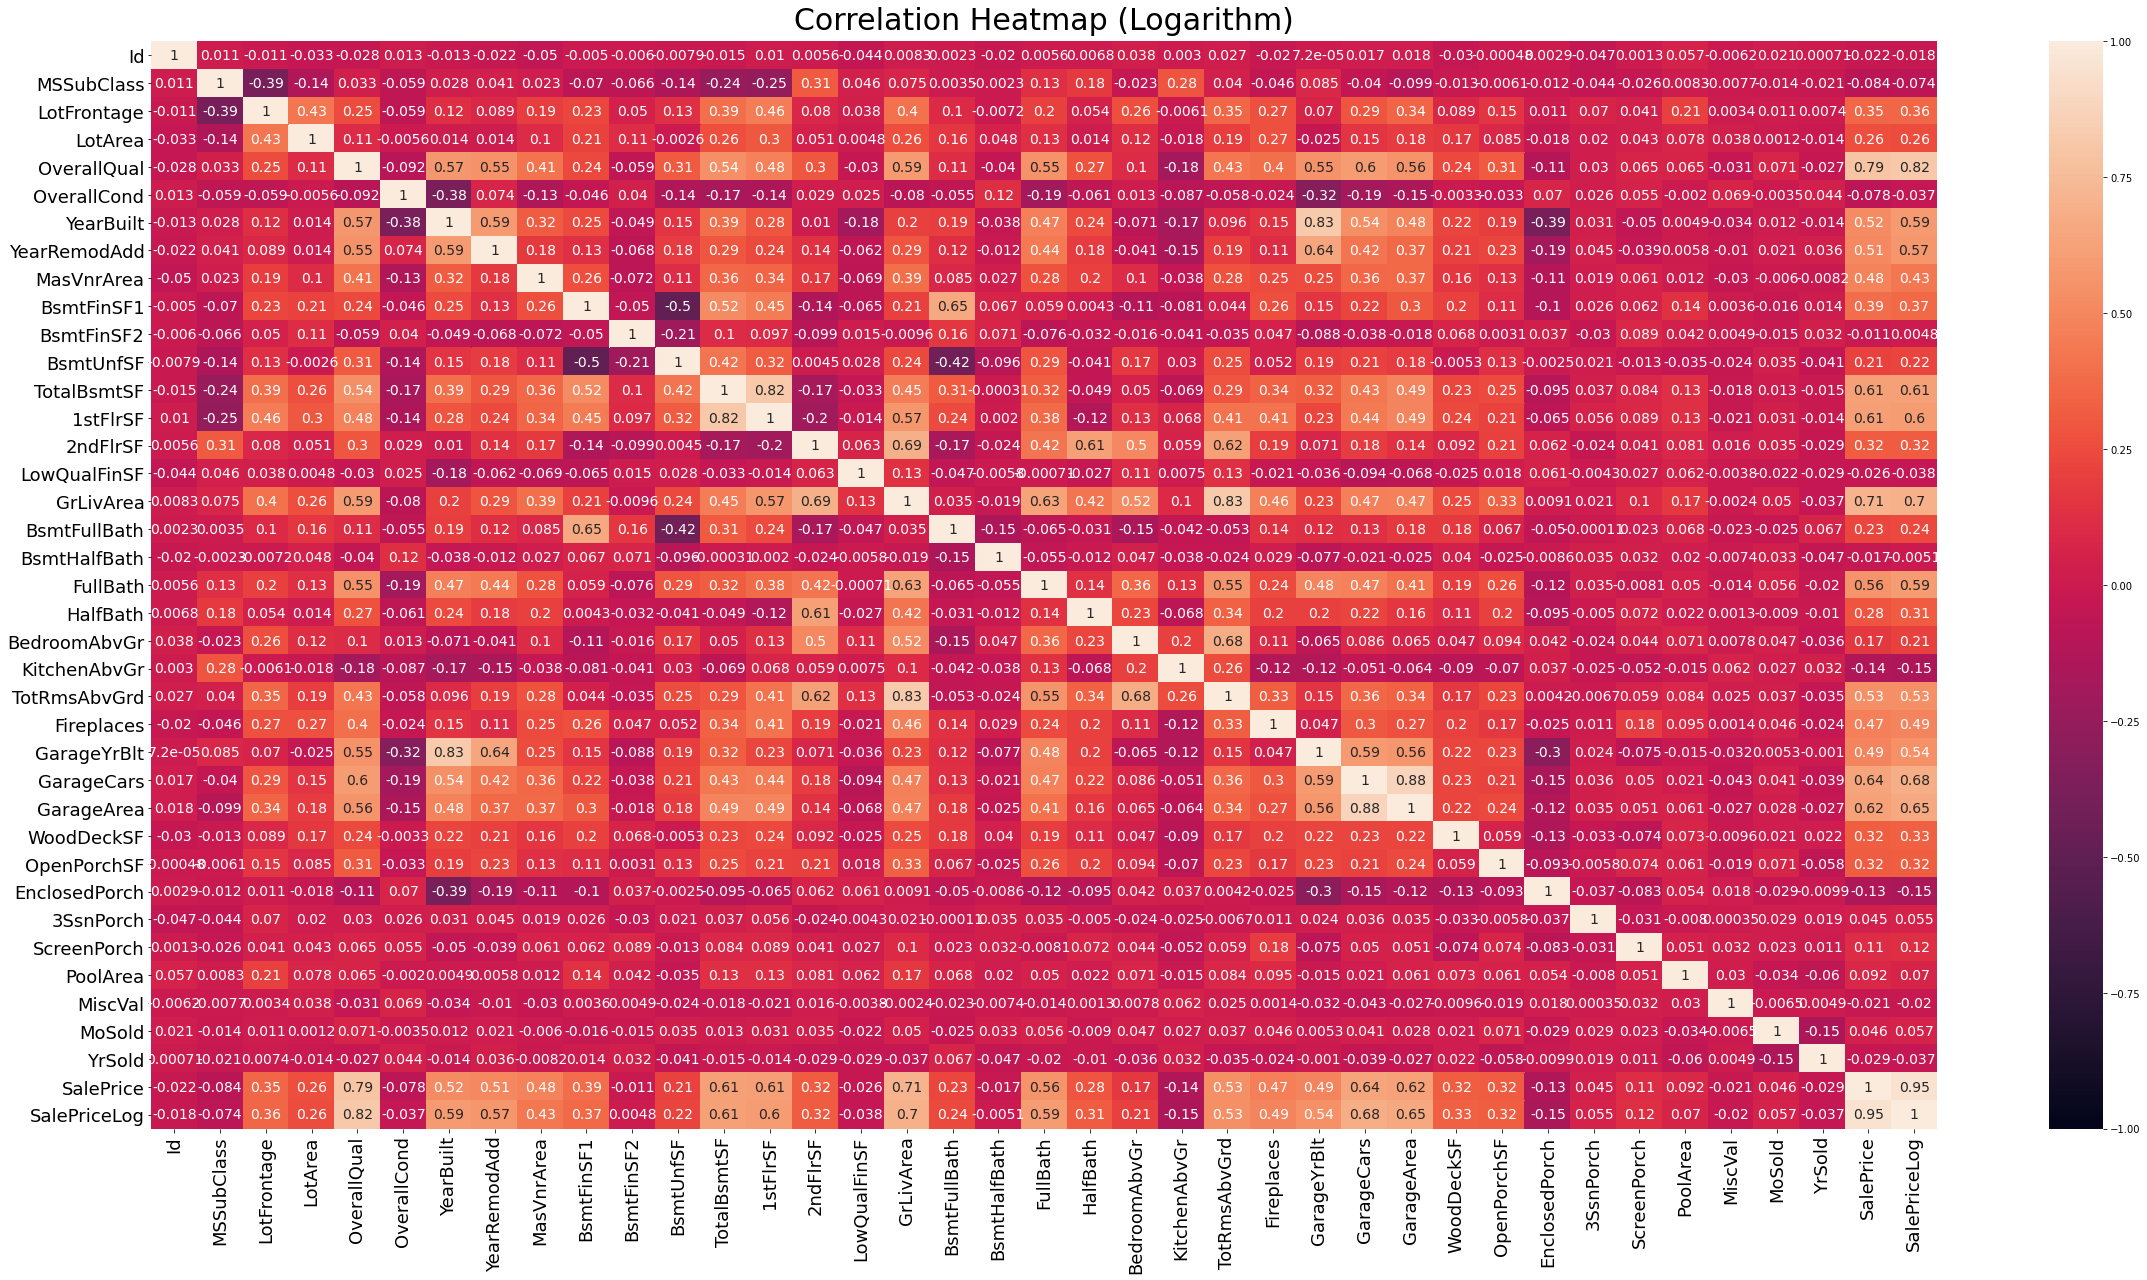

In [29]:
DataFrame['SalePriceLog'] = np.log(DataFrame['SalePrice'])
mtplot.figure(figsize=(40, 20))
LogHM = sb.heatmap(DataFrame.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size": 14})
LogHM.set_xticklabels(LogHM.get_xmajorticklabels(), fontsize = 18)
LogHM.set_yticklabels(LogHM.get_ymajorticklabels(), fontsize = 18)
LogHM.set_title('Correlation Heatmap (Logarithm)', fontdict={'fontsize':30}, pad=12);

4- As shown in the last two columns (or rows), there is a little change in the correlation values. The last column is the logarithm of "SalePrice" column. The positive values have become more positive and negative values have become more negative but the difference is not that much noticable. The corr() function which we use for calculation of relativeness between features, uses Pearson's method which is based on linear dependence of two features, so even if logarithm function doesn't change the order of price values, but it affects the amount of correlation between the features. It's obvious that the effective features have not been changed.

5- The heatmap is just considering numerical features because correlation cannot be calculated for non-numeric values, thus this heatmap doesn't represent any information about categorical features such as "SaleCondition". 

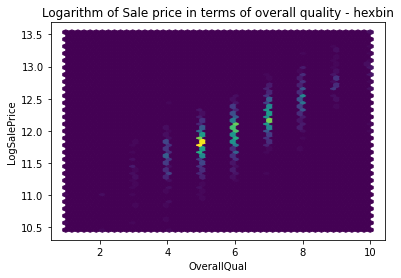

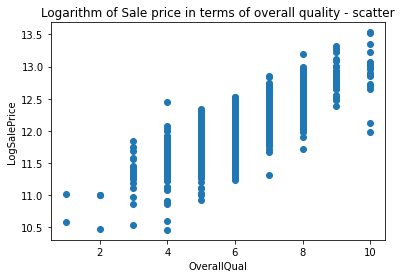

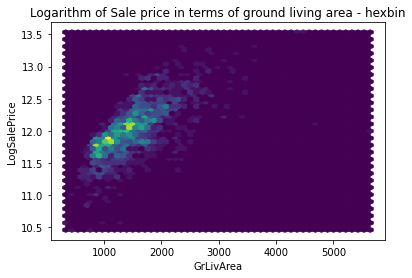

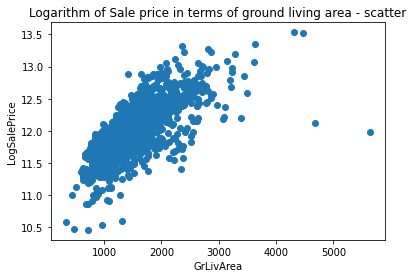

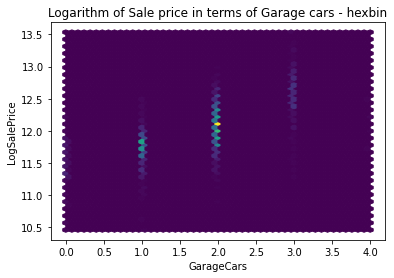

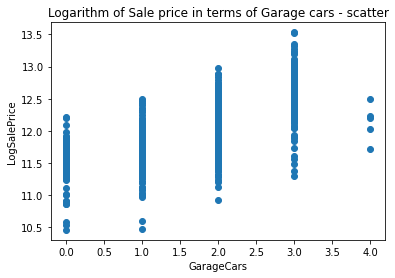

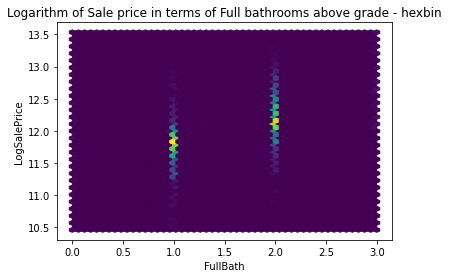

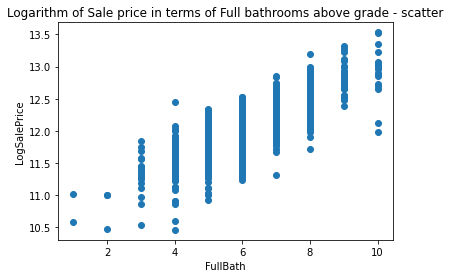

In [30]:
mtplot.hexbin(DataFrame["OverallQual"], DataFrame["SalePriceLog"], gridsize = 50)  
mtplot.title('Logarithm of Sale price in terms of overall quality - hexbin')  
mtplot.xlabel('OverallQual')
mtplot.ylabel('LogSalePrice')
mtplot.show()
mtplot.scatter(DataFrame["OverallQual"], DataFrame["SalePriceLog"])  
mtplot.title('Logarithm of Sale price in terms of overall quality - scatter')  
mtplot.xlabel('OverallQual')
mtplot.ylabel('LogSalePrice')
mtplot.show()

mtplot.hexbin(DataFrame["GrLivArea"], DataFrame["SalePriceLog"], gridsize = 50)  
mtplot.title('Logarithm of Sale price in terms of ground living area - hexbin')  
mtplot.xlabel('GrLivArea')
mtplot.ylabel('LogSalePrice')
mtplot.show()
mtplot.scatter(DataFrame["GrLivArea"], DataFrame["SalePriceLog"])  
mtplot.title('Logarithm of Sale price in terms of ground living area - scatter')  
mtplot.xlabel('GrLivArea')
mtplot.ylabel('LogSalePrice')
mtplot.show()

mtplot.hexbin(DataFrame["GarageCars"], DataFrame["SalePriceLog"], gridsize = 50)  
mtplot.title('Logarithm of Sale price in terms of Garage cars - hexbin')  
mtplot.xlabel('GarageCars')
mtplot.ylabel('LogSalePrice')
mtplot.show()
mtplot.scatter(DataFrame["GarageCars"], DataFrame["SalePriceLog"])  
mtplot.title('Logarithm of Sale price in terms of Garage cars - scatter')  
mtplot.xlabel('GarageCars')
mtplot.ylabel('LogSalePrice')
mtplot.show()

mtplot.hexbin(DataFrame["FullBath"], DataFrame["SalePriceLog"], gridsize = 50)  
mtplot.title('Logarithm of Sale price in terms of Full bathrooms above grade - hexbin')  
mtplot.xlabel('FullBath')
mtplot.ylabel('LogSalePrice')
mtplot.show()
mtplot.scatter(DataFrame["OverallQual"], DataFrame["SalePriceLog"])  
mtplot.title('Logarithm of Sale price in terms of Full bathrooms above grade - scatter')  
mtplot.xlabel('FullBath')
mtplot.ylabel('LogSalePrice')
mtplot.show()



6- As shown in the figures, all of the mentioned features have a direct relation with SalePrice value since in all of them, y-axis value increases with x-axis value. 

7- I took a brief look at data description file, and I think that features like "YearBuilt", "TotRmsAbvGrd" and "OpenPorchSF" are significant in home pricing. The plots for each of these 3 features are shown below.

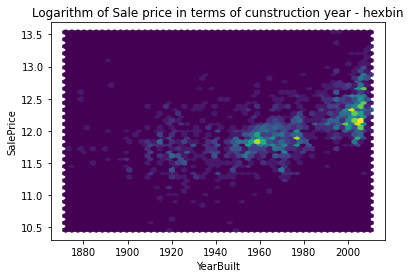

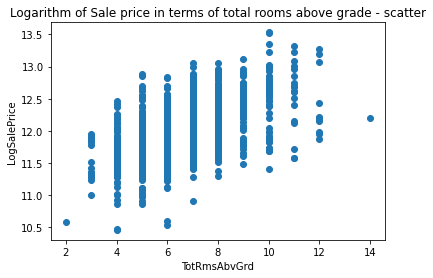

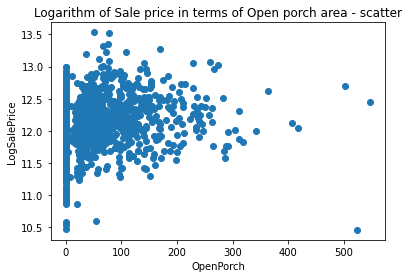

In [31]:
mtplot.hexbin(DataFrame["YearBuilt"], DataFrame["SalePriceLog"], gridsize = 50)  
mtplot.title('Logarithm of Sale price in terms of cunstruction year - hexbin')  
mtplot.xlabel('YearBuilt')
mtplot.ylabel('SalePrice')
mtplot.show()


mtplot.scatter(DataFrame["TotRmsAbvGrd"], DataFrame["SalePriceLog"])  
mtplot.title('Logarithm of Sale price in terms of total rooms above grade - scatter')  
mtplot.xlabel('TotRmsAbvGrd')
mtplot.ylabel('LogSalePrice')
mtplot.show()


mtplot.scatter(DataFrame["OpenPorchSF"], DataFrame["SalePriceLog"])  
mtplot.title('Logarithm of Sale price in terms of Open porch area - scatter')  
mtplot.xlabel('OpenPorch')
mtplot.ylabel('LogSalePrice')
mtplot.show()


The direct effect of these 3 features on the SalePrice Logarithm is obvious on the plots.

### Phase 1: PreProcessing

1- Missing values solutions:
I) Deleting the whole column: In my opinion, this method is not a reasonable approach, since a column may have a very low percentage of missing data and deleting the whole column (which may be a effective feature) probably is not a good idea, just because of that small part of missing data. In some cases that more that 10 percents of a column's fields are missing, this method can be a safe approach.

II) Replacing with mean of the column or other statistical info. : Replacing "NaN"s with mean of the column can be done for numerical columns, cause an object-type column do not have mean. This may be a good approach for numerical columns which have float or int type but we have to choose a replacement method for non-numeric columns. 

III) Replacing with the most repeated (for non-numerical columns): In categorical columns, this method may be a good idea which we suppose that the missing field had the value of most-repeated category's value in that column. 

IV) Deleting the record (row): Another approach for this problem is deleting the information of the House which has a missing field. The result of this method is that we do not count that record in our calculations and we assume that we didn't have it from the beginning.

V) Guessing the value based on related columns: One way is to use another column's data to guess the missing values (which is mainly used for the target column). This feature has to be related to our target column so that we can make an appropriate estimation from the missing value.

My choice is using II for numerical columns and III for non-nomerical columns because they doesn't require any deletion. Besides, I'll use the first method for "LotFrontage" column because it has 17% missing data and results gained from this column with other methods may not be reliable.

In [32]:
def handle_NaN(DataFrame):
    DataFrame = replace_nothing(DataFrame)
    for column in DataFrame.columns:
        if column == "SalePriceLog":
            continue
        if missing[column] > 10:
            del DataFrame[column]
        elif missing[column] > 0:
            if DataFrame[column].dtype == "object":
                DataFrame[column].fillna(DataFrame[column].value_counts().idxmax(), inplace=True)
#                 print("column %s replaced with: " % column, DataFrame[column].value_counts().idxmax())
            else:
                DataFrame[column].fillna(DataFrame[column].mean(), inplace=True)
#                 print("column %s replaced with: " % column, DataFrame[column].mean())
    
    return DataFrame

2- In the output, is shown that in each column "Nan"s are filled with which value. In numerical columns, "NaN"s are replaced with mean() of the column and in non-numerical columns, "NaN"s are replaced with mode of that column.

In the dataframe, the LotFrontage column has the most missing values (17%) and I've decided to remove it from the dataframe.
#### ** The columns which had more that 10% missing values have been deleted from the dataframe.

3- Normalizing vs. Standardizing:
Normalizing solves some scaling issues. For example, the bedroom count's range is less than 10 and in this dataset, it is being compared with a feature like LotArea which is about 10000 and bigger. We can scale all of the features to the (0, 1) range using normalization and our training will not be sensitive to scale of the features anymore. But there is one thing, that normalization is not suitable when scaling is important and the data is proportional. 
Standardizing centeres the values around 0 and the final mean will be 0 and std will be equal to 1. This operation gives us the ability to compare values with different scales or units. Standardizing is better fot datasets with different scales and units which it is in out dataset.

Both of these 2 operations are useful for different purposes.

In [33]:
from sklearn import preprocessing
import numpy as np


def df_standardizer(df):
    numeric_columns = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
    numeric_columns = numeric_columns.delete([0, len(numeric_columns) - 1])
    standard_DF = df.copy()
    standardiser = preprocessing.StandardScaler()
    standard_DF[numeric_columns] = standardiser.fit_transform(standard_DF[numeric_columns])
    return standard_DF

def df_normalizer(df):
    numeric_columns = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
    numeric_columns = numeric_columns.delete([0, len(numeric_columns) - 1])
    normalized_DF = df.copy()
    normalized_DF[numeric_columns] = preprocessing.normalize(normalized_DF[numeric_columns])
    return normalized_DF


With the above procedures, the numeric columns (except Id, SalePrice and SalePriceLog) have been selected to be normalized and standardized. At the end, standard dataframe is stored in standard_DF and normalized dataframe is stored in normalized_DF variable. In standard_DF we can see some negative values and in normalized_DF we can see that all the values are between 0 and 1.

4- Categorical data:
There are 3 types of categorical data:
- Binary: For the first type, we can encode them easily to 0 and 1 with the np.replace() function, thus this type of categorical data can be handled.
- Ordinal: This type of columns have categories which can have a order for themselves, for example quality categories such as Excellent, Very good, Good, Average, Poor etc. We can define a dictionary mapping for these kind of ordering and replace the strings with these values. 
- Nominal: This type of categorical data do not have any specific order. Dropping these kind of data might be a way but they can contain important information and dropping them can be dangerous. There are some methods such as One-Hot encoding which adds some columns to the dataframe and indicates the category using binary coding. Each category's column is 1 one the records that are in that category.

In conclusion, we have to see which type of categories are included in a column and handle it with the appropriate method.

Binary columns: Street, CentralAir

Ordinal columns: LotShape, Utilities, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageFinish, GarageQual, GarageCond, PoolQC

Nominal columns: MSZoning, Alley, LandContour, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Heating, Electrical, Functional, GarageType, PavedDrive, Fence, MiscFeature, SaleType, SaleCondition

In [34]:
def categoric_to_numeric(df):
    LotShape_map = {'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}
    Utilities_map = {'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}
    LandSlope_map = {'Gtl':1, 'Mod':2, 'Sev':3}
    Quality_map = {'Nothing':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
    BsmtExp_map = {'Nothing':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
    FinType_map = {'Nothing':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6, 'RFn':2, 'Fin':3}
    
    df['Street'] = df['Street'].map({'Pave':1, 'Grvl':0})
    df['CentralAir'] = df['CentralAir'].map({'Y':1, 'N':0})
    
    df["LotShape"] = df["LotShape"].map(LotShape_map)
    df["Utilities"] = df["Utilities"].map(Utilities_map)
    df["ExterQual"] = df["ExterQual"].map(Quality_map)
    df["ExterCond"] = df["ExterCond"].map(Quality_map)
    df["BsmtQual"] = df["BsmtQual"].map(Quality_map)
    df["BsmtCond"] = df["BsmtCond"].map(Quality_map)
    df["BsmtExposure"] = df["BsmtExposure"].map(BsmtExp_map)
    df["BsmtFinType1"] = df["BsmtFinType1"].map(FinType_map)
    df["BsmtFinType2"] = df["BsmtFinType2"].map(FinType_map)
    df["HeatingQC"] = df["HeatingQC"].map(Quality_map)
    df["KitchenQual"] = df["KitchenQual"].map(Quality_map)
    df["FireplaceQu"] = df["FireplaceQu"].map(Quality_map)
    df["GarageFinish"] = df["GarageFinish"].map(FinType_map)
    df["GarageQual"] = df["GarageQual"].map(Quality_map)
    df["GarageCond"] = df["GarageCond"].map(Quality_map)
    df["PoolQC"] = df["PoolQC"].map(Quality_map)
    
    nominal_columns = []
    for column in df.columns:
        if df[column].dtype == object:
            nominal_columns.append(column)
    df = pd.get_dummies(df, columns = nominal_columns, drop_first = True)
    return df

DataFrame = categoric_to_numeric(DataFrame)
DataFrame.describe()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,0.995890,0.408219,3.998630,6.099315,5.575342,1971.267808,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,42.300571,24.284752,9981.264932,0.063996,0.582296,0.052342,1.382997,1.112799,30.202904,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,20.000000,21.000000,1300.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1872.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,1.000000,0.000000,4.000000,5.000000,5.000000,1954.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,1.000000,0.000000,4.000000,6.000000,5.000000,1973.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,1.000000,1.000000,4.000000,7.000000,6.000000,2000.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,1.000000,3.000000,4.000000,10.000000,9.000000,2010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In the defined function, all of the categorical methods have been converted to integer columns using the appropriate method. As a result, we can see that there is no more 'object' type column in the DataFrame.

5- Some columns can be removed from the dataset. According to the drawn heatmap at Phase 0, we can omit non-related features that have the least correlation with final SalePrice. "EnclosedPorch", "KithchenAbvGr" and some other columns can be deleted for saving time in calculations. There are some categorical features which I guess that are not important such as "Exterior1st" or "Exterior2nd". Nominal categorical features add some extra columns, thus we can save time and avoide redundant columns with droping these columns.

6- Training algorithms: dividing train data into 2 parts -- train and test (validation)

- Leave-p-out: In this method, we mark p-percentage of the train data as test(validation) part. After learning with the train part, we can test the learnings on the validation data and if the results are not satisfying, the procedure can be repeated.

- Cross validation: In this method, a part of the data is chosen as train and the rest is chosen as validation data. After training the model and testing it, this definition is switched and the train part becomes the validation part and vice versa.

- There are some other ways to split the data for training and testing such as "holdout" method used in the sklearn.train_test_split() function.

* I think a value between 10-30% of data is reasonable for p. I'll specify p = 25% for dividing the data into train and test parts.

The dataframe has been splited separately in the function of methods of learning.

#### Phase 2: Model Training, Evaluation and Hyperparameter Tuning

In this phase, we compare and test our preprocessed dataset with 3 different algorithms of learning. The error values are calculated and we find best values for hyperparameters.

In [35]:
def data_standardizer(df):
    standard_DF = df.copy()
    cols = list(df.columns)
    cols.remove('Id')
    cols.remove('SalePrice')
    standardiser = preprocessing.StandardScaler()
    standard_DF[cols] = standardiser.fit_transform(standard_DF[cols])
    return standard_DF

def data_normalizer(df):
    normalized_DF = df.copy()
    cols = list(df.columns)
    cols.remove('Id')
    cols.remove('SalePrice')
    normalized_DF[cols] = preprocessing.normalize(normalized_DF[cols])    
    return normalized_DF


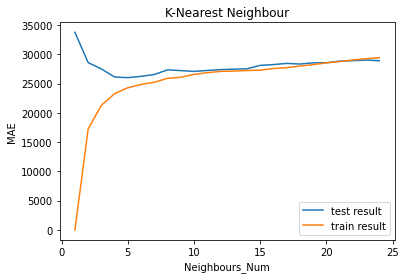

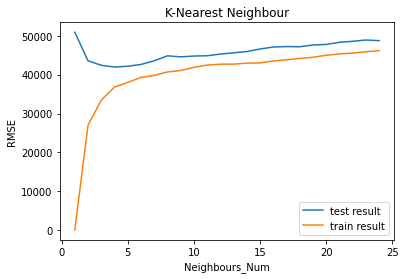

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

def KNN_method(df):
    neighbours = []
    train_MAE = []
    train_RMSE = []
    test_MAE = []
    test_RMSE = []
    target_col = df["SalePrice"].values
    df = df.drop(columns=["Id", "SalePrice"])
    train_df, test_df, train_target, test_target = train_test_split(df, target_col, test_size=0.25, random_state=42)
    for neighbours_num in range(1, 25):
        KNN = KNeighborsRegressor(n_neighbors = neighbours_num)
        KNN.fit(train_df, train_target)    
        test_result = KNN.predict(test_df)
        train_result = KNN.predict(train_df)
        neighbours.append(neighbours_num)
        
        train_MAE.append(metrics.mean_absolute_error(train_target, train_result))
        train_RMSE.append(np.sqrt(metrics.mean_squared_error(train_target, train_result)))
        test_MAE.append(metrics.mean_absolute_error(test_target, test_result))
        test_RMSE.append(np.sqrt(metrics.mean_squared_error(test_target, test_result)))
        
    mtplot.plot(neighbours, np.array(test_MAE).ravel(), label='test result')
    mtplot.plot(neighbours, np.array(train_MAE).ravel(), label='train result')
    mtplot.legend()
    mtplot.xlabel('Neighbours_Num')
    mtplot.ylabel('MAE')
    mtplot.title('K-Nearest Neighbour')
    mtplot.show()
    mtplot.plot(neighbours, np.array(test_RMSE).ravel(), label='test result')
    mtplot.plot(neighbours, np.array(train_RMSE).ravel(), label='train result')
    mtplot.legend()
    mtplot.xlabel('Neighbours_Num')
    mtplot.ylabel('RMSE')
    mtplot.title('K-Nearest Neighbour')
    mtplot.show()

DataFrame = pd.read_csv("train.csv")
DataFrame = handle_NaN(DataFrame)
DataFrame = categoric_to_numeric(DataFrame)
DataFrame = data_normalizer(DataFrame)

KNN_method(DataFrame)

* 3- When max_neighbours is 1 or 2, the model is a bit overfitted because the results on trainings are accurate but on the validation data, we have big errors. The plots show that the best value for max depth is 3 since we have the minimum error. 

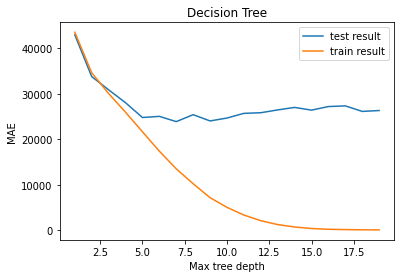

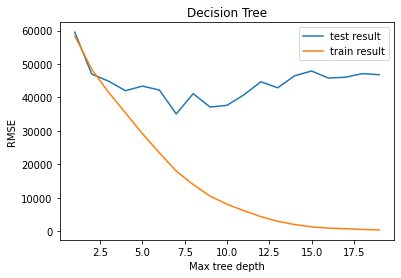

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn import metrics

def DTree_method(df):
    depths = []
    train_MAE = []
    train_RMSE = []
    test_MAE = []
    test_RMSE = []
    target_col = df["SalePrice"].values
    df = df.drop(columns=["Id", "SalePrice"])
    train_df, test_df, train_target, test_target = train_test_split(df, target_col, test_size=0.25, random_state=1)        
    for depth in range(1, 20):
        DTreeClassifier = DecisionTreeRegressor(max_depth=depth)
        DTreeClassifier = DTreeClassifier.fit(train_df, train_target)
        test_result = DTreeClassifier.predict(test_df)
        train_result = DTreeClassifier.predict(train_df)
        depths.append(depth)

        train_MAE.append(metrics.mean_absolute_error(train_target, train_result))
        train_RMSE.append(np.sqrt(metrics.mean_squared_error(train_target, train_result)))
        test_MAE.append(metrics.mean_absolute_error(test_target, test_result))
        test_RMSE.append(np.sqrt(metrics.mean_squared_error(test_target, test_result)))
        
    mtplot.plot(depths, np.array(test_MAE).ravel(), label='test result')
    mtplot.plot(depths, np.array(train_MAE).ravel(), label='train result')
    mtplot.legend()
    mtplot.xlabel('Max tree depth')
    mtplot.ylabel('MAE')
    mtplot.title('Decision Tree')
    mtplot.show()
    mtplot.plot(depths, np.array(test_RMSE).ravel(), label='test result')
    mtplot.plot(depths, np.array(train_RMSE).ravel(), label='train result')
    mtplot.legend()
    mtplot.xlabel('Max tree depth')
    mtplot.ylabel('RMSE')
    mtplot.title('Decision Tree')
    mtplot.show()

DataFrame = pd.read_csv("train.csv")
DataFrame = handle_NaN(DataFrame)
DataFrame = categoric_to_numeric(DataFrame)
DataFrame = data_standardizer(DataFrame)

DTree_method(DataFrame)

* 3- When depth is less than 4, the model is a bit underfitted because it is doing better on validation data in comparison with train data. On max_depth > 15, our model is overfitted because the results on trainings are accurate but on the validation data, we have big errors. The plots show that the best value for max depth is 5 since we have the minimum error. 

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def LReg_method(df):
    target_col = df["SalePrice"].values
    df = df.drop(columns=["Id", "SalePrice"])
    train_df, test_df, train_target, test_target = train_test_split(df, target_col, test_size=0.2, random_state=1)
    LRegClassifier = LinearRegression()  
    LRegClassifier.fit(train_df, train_target)
    test_result = LRegClassifier.predict(test_df)
    train_result = LRegClassifier.predict(train_df)
    print("MAE for train: ", metrics.mean_absolute_error(train_target, train_result))
    print("MAE for test: ", metrics.mean_absolute_error(test_target, test_result))
    print("RMSE for train: ", np.sqrt(metrics.mean_squared_error(train_target, train_result)))
    print("RMSE for test: ", np.sqrt(metrics.mean_squared_error(test_target, test_result)))    

DataFrame = pd.read_csv("train.csv")
DataFrame = handle_NaN(DataFrame)
DataFrame = categoric_to_numeric(DataFrame)
DataFrame = data_normalizer(DataFrame)
LReg_method(DataFrame)

MAE for train:  20602.704555520864
MAE for test:  29670.75973794241
RMSE for train:  32022.976549301053
RMSE for test:  53265.85744505421


4- Preprocessing effects: preprocessing the data has serious effects on the final result accuracy. For example, we can see that without normalizing, the errors of KNN method or Decision tree have increased.

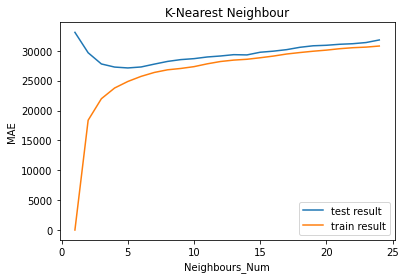

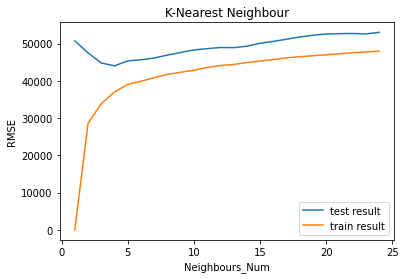

In [39]:
# def drop_NaN(df):
#     for column in df.columns:
#         if df[column].isna().sum() > 0:
#             df.drop(column, inplace=True)
#     return df
            
DataFrame = pd.read_csv("train.csv")
DataFrame = handle_NaN(DataFrame)
DataFrame = categoric_to_numeric(DataFrame)
# DataFrame = data_normalizer(DataFrame)
KNN_method(DataFrame)

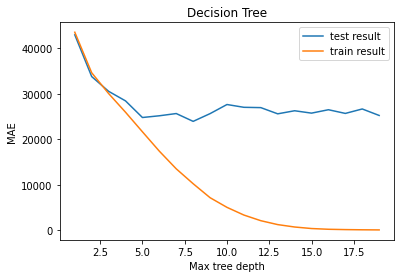

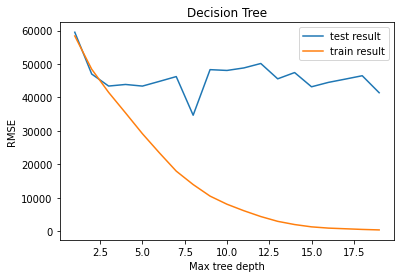

In [40]:
DataFrame = pd.read_csv("train.csv")
DataFrame = handle_NaN(DataFrame)
DataFrame = categoric_to_numeric(DataFrame)

DTree_method(DataFrame)


#### Phase 3: ‫‪Ensemble‬‬ ‫‪Methods‬‬



##### Random Forest: Code

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

def random_forest(df):
    train_MAE = []
    train_RMSE = []
    test_MAE = []
    test_RMSE = []
    X = df.drop(["SalePrice", "Id"], axis=1)
    y = df["SalePrice"]
    train_df, test_df, train_target, test_target = train_test_split(X, y, test_size=0.25, random_state=66)
    n_estimators = [int(x) for x in np.linspace(start=200, stop=400, num=5)]
    max_leaf_nodes = [int(x) for x in np.linspace(start=100, stop=220, num=3)]
    max_samples = [float(x) for x in np.linspace(0.1, 0.9, num=3)]
    print("max_samples: ", max_samples)
    print("n_estimators: ", n_estimators)
    print("max_leaves: ", max_leaf_nodes)
    
#     random_grid = {'n_estimators': n_estimators,
#                    'max_features': max_features,
#                    'max_depth': max_depth}
    
    min_RMSE = 100000
    for n in n_estimators:
        for f in max_leaf_nodes:
            for s in max_samples:
                RF = RandomForestRegressor(n_estimators = n, max_leaf_nodes=f, max_samples=s, max_depth = 20, random_state=42)
                RF.fit(train_df, train_target)
                train_result = RF.predict(train_df)
                test_result = RF.predict(test_df)
                test_RMSE = np.sqrt(metrics.mean_squared_error(test_target, test_result))
                print("n_estimators: {}, \tmax_leaf_nodes: {}, \tmax_samples: {}".format(n, f, s))
                print("RMSE for test: ", test_RMSE)
                print("\n")
                if min_RMSE > test_RMSE:
                    best = (n, f, s)
                    min_RMSE = test_RMSE
    
    
    print("Min RMSE: ", min_RMSE)
    print("Best: ", best)
#     RF = RandomForestRegressor()
#     RF_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid,
#                                    n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#     RF_random.fit(X, y)
#     best_hyperparams = RF_random.best_params_
#     RF = RandomForestRegressor(n_estimators=best_hyperparams["n_estimators"], 
#                                 max_depth=best_hyperparams["max_depth"], 
#                                 max_features=best_hyperparams["max_features"])
    
#     RF.fit(train_df, train_target)
#     train_result = RF.predict(train_df)
#     test_result = RF.predict(test_df)

#     print("MAE for train: ", metrics.mean_absolute_error(train_target, train_result))
#     print("MAE for test: ", metrics.mean_absolute_error(test_target, test_result))
#     print("RMSE for train: ", np.sqrt(metrics.mean_squared_error(train_target, train_result)))
#     print("RMSE for test: ", np.sqrt(metrics.mean_squared_error(test_target, test_result)))    
#     print("Best resulted parameters: ")
#     pprint(RF_random.best_params_)

DataFrame = pd.read_csv("train.csv")
DataFrame = handle_NaN(DataFrame)
DataFrame = categoric_to_numeric(DataFrame)
DataFrame = data_normalizer(DataFrame)
random_forest(DataFrame)

max_samples:  [0.1, 0.5, 0.9]
n_estimators:  [200, 250, 300, 350, 400]
max_leaves:  [100, 160, 220]
n_estimators: 200, 	max_leaf_nodes: 100, 	max_samples: 0.1
RMSE for test:  42531.16802173022


n_estimators: 200, 	max_leaf_nodes: 100, 	max_samples: 0.5
RMSE for test:  37665.425900425835


n_estimators: 200, 	max_leaf_nodes: 100, 	max_samples: 0.9
RMSE for test:  37216.797192630656


n_estimators: 200, 	max_leaf_nodes: 160, 	max_samples: 0.1
RMSE for test:  42531.11879665806


n_estimators: 200, 	max_leaf_nodes: 160, 	max_samples: 0.5
RMSE for test:  37498.2979354037


n_estimators: 200, 	max_leaf_nodes: 160, 	max_samples: 0.9
RMSE for test:  36936.71505999061


n_estimators: 200, 	max_leaf_nodes: 220, 	max_samples: 0.1
RMSE for test:  42531.11879665806


n_estimators: 200, 	max_leaf_nodes: 220, 	max_samples: 0.5
RMSE for test:  37494.74257697046


n_estimators: 200, 	max_leaf_nodes: 220, 	max_samples: 0.9
RMSE for test:  36818.65468273807


n_estimators: 250, 	max_leaf_nodes: 100, 	ma

#### Random Forest: 
For implementing this algorithm, I examined the model with changing 3 hyper-parameters: max_depth, n_estimator and max_features. Then using RandomizedSearchCV library, I tested all of the possible conditions with these parameters and this library, found the best combination. Then I've printed the amount of error using this hyper-parameters at the end. 

##### Voting regression: Code

In [42]:
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


def voting_regression(df):
    rnd_clf = RandomForestClassifier()
    X = df.drop(["SalePrice", "Id"], axis=1)
    y = df["SalePrice"]
    train_df, test_df, train_target, test_target = train_test_split(X, y, test_size=0.25, random_state=66)
    LReg = LinearRegression()  
    LReg = LReg.fit(train_df, train_target)
    KNN = KNeighborsRegressor(n_neighbors = 3)
    KNN = KNN.fit(train_df, train_target)
    DTree = DecisionTreeRegressor(max_depth=14, random_state  = 42)
    DTree = DTree.fit(train_df, train_target)
    
    votingCls = VotingRegressor(estimators = [('knn', KNN), ('decision_tree', DTree), 
                                               ('linear_reg', LReg)])
    votingCls = votingCls.fit(train_df, train_target)
    
    train_result = votingCls.predict(train_df)
    test_result = votingCls.predict(test_df)

    print("MAE for train: ", metrics.mean_absolute_error(train_target, train_result))
    print("MAE for test: ", metrics.mean_absolute_error(test_target, test_result))
    print("RMSE for train: ", np.sqrt(metrics.mean_squared_error(train_target, train_result)))
    print("RMSE for test: ", np.sqrt(metrics.mean_squared_error(test_target, test_result)))    
       
DataFrame = pd.read_csv("train.csv")
DataFrame = handle_NaN(DataFrame)
DataFrame = categoric_to_numeric(DataFrame)
DataFrame = data_normalizer(DataFrame)
voting_regression(DataFrame)

MAE for train:  11257.230850566672
MAE for test:  25292.653919785622
RMSE for train:  17815.637094381593
RMSE for test:  47107.54316768907


#### Voting Regression:
In this type of learning, we vote between 3 other classifiers (with hard voting type) and the result is the votingCls class which I've printed its errors.


This type of classification works better that other 3 classifiers in Phase 2 because it chooses the best classifier in giving a weight to each column. If one of the classifiers wins all of the votings, it means that our votingCls in equal to that classifier, thus voting classifier is better (or same) than the classifiers that we want to vote them since it chooses the best and ignores the weakness of each classifier. In fact, voting classifier is a selection of all other classifiers.

##### As we see, our MAE and RMSE errors for voting regression are less than linear regression.